# Machine Learning (WS 24 / 25) – Project 1

**Authors**
- Alexander Rödle
- Gurwinder Singh  

<br>

> **Abstract**  
> This project involves selecting one dataset from bike-sharing demand, energy efficiency, or wine quality to perform regression and classification analyses. The workflow includes data understanding, exploration, and preparation, followed by training a regression model to predict a target variable and a classification model for a different target. The models will be evaluated, fine-tuned, and compared to assess their suitability for the chosen dataset's analysis goals.

## 1. Business understanding and data collection

### 1a. Inform yourself about the datasets:

- **Bike Sharing Usage**: This dataset contains data on Seoul’s bike-sharing demand, weather conditions, and temporal variables. The goal is to analyze patterns and predict *functioning  day*.
- **Energy Efficiency of Buildings**: Contains data on building characteristics like orientation, glazing area, and energy consumption. The goal is to model *heating and cooling loads*.
- **Wine Quality**: Features chemical properties of wines and their quality ratings. The goal is to predict *wine quality* based on its features.
  
### 1b. Selected dataset

We chose the *Bike Sharing Usage* dataset because it provides a diverse set of features, including time and weather data, making it interesting for analysis. Additionally, its seasonal data serves as a meaningful target for classification tasks

### 1c. Load dataset

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducability
seed_val = 42
np.random.seed(seed_val)

# Import data using appropriate encoding
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## 2. Data exploration

### 2a. Count variables and instances

**Variables**: 14
**Instances**: 8760

### 2b. Variable names

All variables have *meaningful* and *understandable* names.  
Renaming is not required in our opinion

### 2c. Explore data visually and statistically

In [2]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


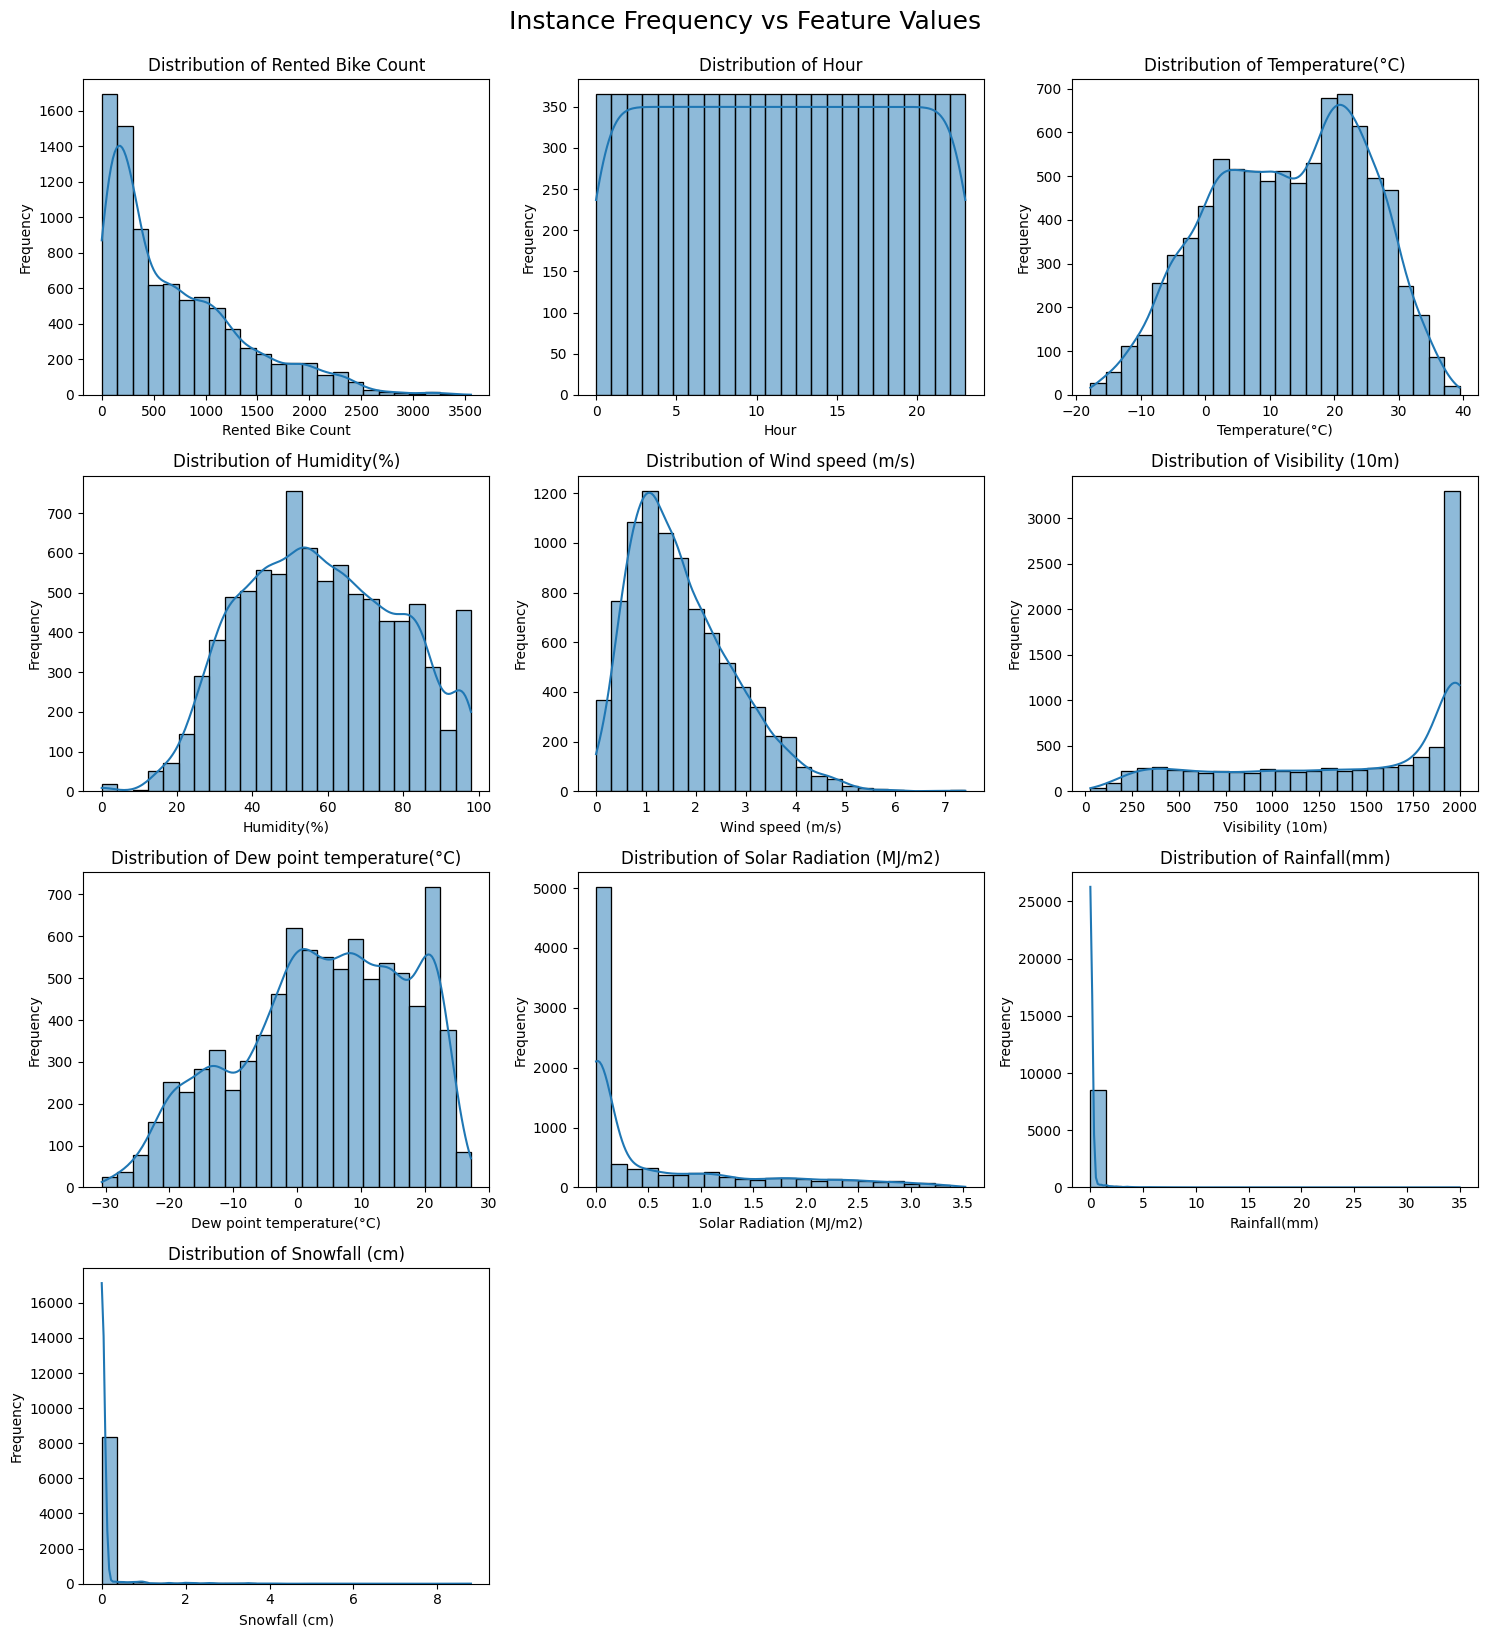

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
Grouped histograms using Seaborn
"""

# Numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns  
n_cols = 3  # Number of plots per row
# Calculate rows needed using ceiling division
n_rows = -(-len(numeric_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten axes for easier indexing

for idx, column in enumerate(numeric_columns):
    # Kernel Density Estimation => smooth distribution curve :)
    sns.histplot(df[column], kde=True, ax=axes[idx], bins=24)
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

# Hide any unused subplots
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

fig.tight_layout()
fig.suptitle("Instance Frequency vs Feature Values", fontsize=18, y=1.02)  # Global title
plt.show()

In [4]:
# Variance
df[numeric_columns].var()

Rented Bike Count            416021.733390
Hour                             47.922137
Temperature(°C)                 142.678850
Humidity(%)                     414.627875
Wind speed (m/s)                  1.073918
Visibility (10m)             370027.323001
Dew point temperature(°C)       170.573247
Solar Radiation (MJ/m2)           0.754720
Rainfall(mm)                      1.272819
Snowfall (cm)                     0.190747
dtype: float64

- Most features, such as `Visibility`, `Solar Radiation`, `Rainfall`, and `Snowfall`, are highly skewed toward lower values, with many observations concentrated at their minimums.  
- Hourly data (`Hour`) is uniformly distributed, indicating consistent data collection across the day.  
- Features like `Temperature`, `Dew Point Temperature`, and `Humidity` show more balanced distributions, with `Temperature` slightly bell-shaped and seasonal.  
- `Rented Bike Count` follows a typical demand pattern, skewed toward lower values but with notable variability.  

### 2d. Data correlations

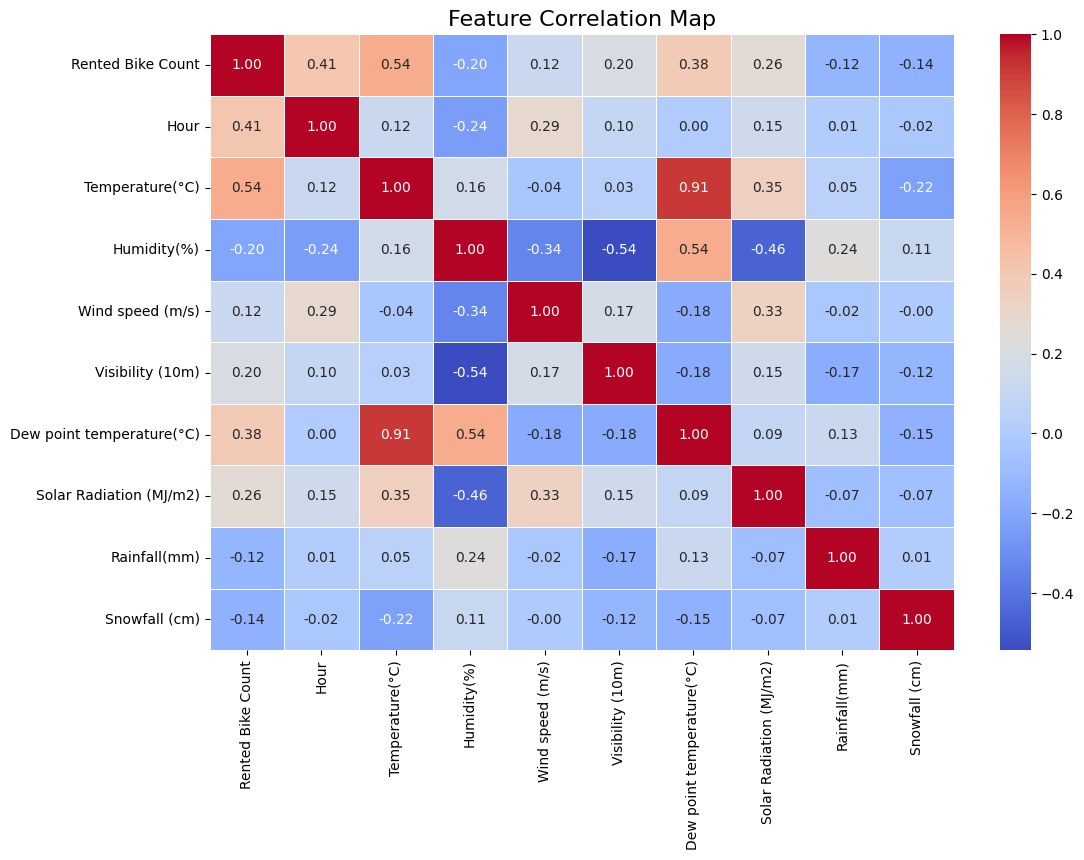

In [5]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar=True
)

plt.title("Feature Correlation Map", fontsize=16)
plt.show()

The dataset offers quite some correlation within the numeric features. `Dew point temperature` and `Temperature` have a *high positive* correlation of `0.91`.  
There are also *negative* correlations like between `Humidity` and `Visibility` with a magnitude of `-0.54`.  
The *regression* target `Rented Bike Count` shows some correlation with temperature data as well as time.

## 3. Data preperation

In this section, we will focus on preparing the dataset for modeling. This includes checking if data cleaning or encoding is necessary, evaluating the need for additional feature engineering, splitting the dataset into subsets, and ensuring proper feature scaling to optimize model performance.
### 3a. Data cleaning

In [6]:
# Check for missing values
null_values = df.isnull().sum().sum()
print("Missing values in dataset: ", null_values)

# Check for infinite values
infinite_values = df.replace([np.inf, -np.inf], np.nan).isnull().sum().sum()
print("Infinite values in dataset: ", infinite_values)

Missing values in dataset:  0
Infinite values in dataset:  0


The dataset seems to be in perfect order having no *null* or *infinite* values!

### 3b. Data encoding

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Numeric types like *float64(6)* and *int64(4)* are perfectly compatible with most classifier models.  
Objects *object(4)* on the other hand require encoding or transformation.


In [8]:
date_sample = df["Date"][0] # Date encoding
season_sample = df["Seasons"][0]
holiday_sample = df["Holiday"][0]
function_day_sample = df["Functioning Day"][0]

# All objects seem to be string encoded
print(f"Samples: '{date_sample}', '{season_sample}', '{holiday_sample}', '{function_day_sample}'")

print("\nUniques:")
# print(df["Date"].unique()) # Its every date, trust me ;)
print(df["Seasons"].unique()) # Label encoding
print(df["Holiday"].unique()) # Binary encoding
print(df["Functioning Day"].unique()) # Binary encoding

Samples: '01/12/2017', 'Winter', 'No Holiday', 'Yes'

Uniques:
['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']


In [9]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Label encode Seasons
encoder = LabelEncoder()
df_encoded["Seasons"] = encoder.fit_transform(df['Seasons'])

# Binary encode Holiday & Functioning Day
df_encoded['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1}).astype('int8')
df_encoded['Functioning Day'] = df['Functioning Day'].map({'No': 0, 'Yes': 1}).astype('int8')

# Encode Date
df_encoded['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Lets check the datatypes of the encoded features
df_encoded.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                               int64
Holiday                                int8
Functioning Day                        int8
dtype: object

### 3c. Feature engerneering

The `datetime64[ns]` is numeric, but not really helpful.  
Lets extract the *day*, *month* and *year* from the timestamp

In [10]:
# Remove Date from dataframe
df_date = df_encoded.pop('Date')

# Extract Day, Month and Year as feature
df_encoded['Day'] = df_date.dt.day
df_encoded['Month'] = df_date.dt.month
# df_encoded['Year'] = df_date.dt.year

df_encoded.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                        int64
Holiday                         int8
Functioning Day                 int8
Day                            int32
Month                          int32
dtype: object

## 3d. Split datasets

In [11]:
# All features but target
X = df_encoded.drop("Rented Bike Count", axis=1)
# Just the target
y = df_encoded["Rented Bike Count"]

## 3e. Feature scaling

In [12]:
X.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.495890,0.049315,0.966324,15.720548,6.526027
std,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404,8.796749,3.448048
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000
50%,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000,0.000000,1.000000,16.000000,7.000000
75%,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,0.000000,1.000000,23.000000,10.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000,31.000000,12.000000


As already noted in [2c. Explore data visually and statistically](#2c-explore-data-visually-and-statistically) features have very different value ranges.  
Standardizing the dataset ensures that features like "Visibility (10m)" and "Solar Radiation (MJ/m2)", which have vastly different scales, are brought to the same range.  
This is crucial for our analysis as it prevents features with larger scales from dominating the model and ensures fair contributions from all features, improving the performance of models sensitive to feature scaling.

In [13]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X_scaled_tmp = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_tmp, columns=X.columns, index=X.index)
# X_scaled = X
print("Scaled features:")
X_scaled

Scaled features:


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,-0.227757,0.18668,-1.673503,1.587648
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,-0.227757,0.18668,-1.673503,1.587648
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,1.349771,-0.227757,0.18668,-1.673503,1.587648
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,-0.227757,0.18668,-1.673503,1.587648
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,1.349771,-0.227757,0.18668,-1.673503,1.587648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,-1.342395,-0.227757,0.18668,1.623357,1.297612
8756,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,-0.227757,0.18668,1.623357,1.297612
8757,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,-0.227757,0.18668,1.623357,1.297612
8758,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,-1.342395,-0.227757,0.18668,1.623357,1.297612


## 4. Modelling: Regression

### 4a.Analysis goal and features

The analysis goal is to predict the *bike demand* aka. *Rented Bike Count*.  

Lets check for correlations between our target and features accounting the new ones.

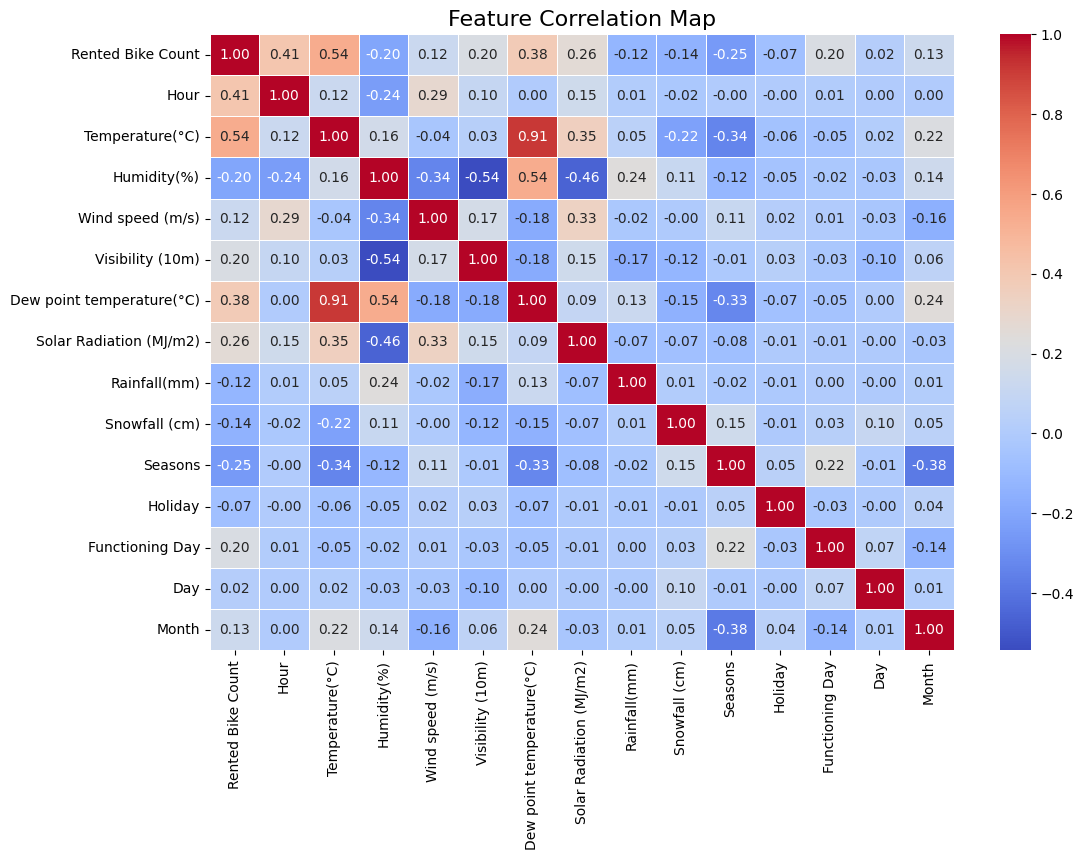

In [ ]:
correlation_matrix = df_encoded.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar=True
)

plt.title("Feature Correlation Map", fontsize=16)
plt.show()

In [15]:
n = 6
correlations = correlation_matrix["Rented Bike Count"].drop("Rented Bike Count")
# Sort by absolute value while keeping the sign
top_n_correlations = correlations.reindex(correlations.abs().nlargest(n).index)
# Select the top n features from X_scaled
X_selected = X_scaled[top_n_correlations.index]

print(f"Top {n} Correlations with Rented Bike Count:")
print(top_n_correlations)
X_selected

Top 6 Correlations with Rented Bike Count:
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Seasons                     -0.253058
Functioning Day              0.203943
Name: Rented Bike Count, dtype: float64


,Temperature(°C),Hour,Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Functioning Day
0,-1.513957,-1.661325,-1.659605,-0.655132,1.349771,0.18668
1,-1.539074,-1.516862,-1.659605,-0.655132,1.349771,0.18668
2,-1.580936,-1.372399,-1.667262,-0.655132,1.349771,0.18668
3,-1.597680,-1.227936,-1.659605,-0.655132,1.349771,0.18668
4,-1.580936,-1.083473,-1.736177,-0.655132,1.349771,0.18668
...,...,...,...,...,...,...
8755,-0.726961,1.083473,-1.100630,-0.655132,-1.342395,0.18668
8756,-0.793939,1.227936,-1.070001,-0.655132,-1.342395,0.18668
8757,-0.860918,1.372399,-1.070001,-0.655132,-1.342395,0.18668
8758,-0.902779,1.516862,-1.062344,-0.655132,-1.342395,0.18668


### 4b. Model selection

**Model**: Linear Regression to predict the relationship between features and the target variable.  
**Performance Metric**: Mean Squared Error (MSE) to evaluate prediction accuracy, penalizing large errors.  
**Learning Algorithm**: Stochastic Gradient Descent (SGD) for scalable and efficient optimization on large datasets.  

In [16]:
from sklearn.model_selection import train_test_split
# Create train, validation and test split

X_train: np.ndarray
X_temp: np.ndarray
y_train: np.ndarray
y_temp: np.ndarray

X_val: np.ndarray
X_test: np.ndarray
y_val: np.ndarray
y_test: np.ndarray

X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, random_state=seed_val)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed_val)

# Create a DataFrame with the lengths
data_frame_sizes = pd.DataFrame({
    'Train': [len(X_train), 70],
    'Validate': [len(X_val), 15],
    'Test': [len(X_test), 15]
})

data_frame_sizes.index = ['Absolute', 'Percentage']

print(f"Dataset sizes:\n{data_frame_sizes}")

Dataset sizes:
            Train  Validate  Test
Absolute     6132      1314  1314
Percentage     70        15    15


### 4c. Model Performance

Lets see how a basic *LinearRegression* performs on our feature set

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Error on training data
y_train_pred = lin_reg.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

# Error on validation data
y_val_pred = lin_reg.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_val_pred)

y_train_baseline = y_train.mean()
print(rmse_train/y_train_baseline)

print("RMSE on train data = ", rmse_train)
print("RMSE on val data = ", rmse_val)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print("R squared on train: ", r2_train)
print("R squared on val: ", r2_val)



0.6296469410671782
RMSE on train data =  0.9350236538417687
RMSE on val data =  0.9508137811702634
R squared on train:  0.2927060788688429
R squared on val:  0.2741108730505545


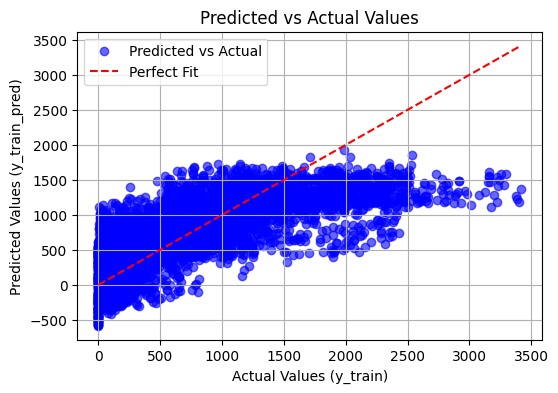

In [18]:
plt.figure(figsize=(6, 4))

# Plot predicted vs actual values
plt.scatter(y_train, y_train_pred, alpha=0.6, label="Predicted vs Actual", color="b")

# Reference line for perfect prediction
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", label="Perfect Fit")

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_train_pred)")
plt.title("Predicted vs Actual Values")
plt.grid()
plt.legend()
plt.show()

In [19]:
y_test_pred = lin_reg.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE on test data = ", rmse_test)
print("R squared on test data = ", r2_test)

RMSE on test data =  438.9741642410603
R squared on test data =  0.5236962337843465


Lets compare the performance of *LinerRegression* with *Stochastik-Gradient-Decent* 

In [53]:
# Define hyperparameters
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

n_epochs = 2000
learning_rate = 0.01

# sgd_reg = SGDRegressor(max_iter=1, eta0=learning_rate, penalty=None, learning_rate="constant",
#                        random_state=seed_val)


param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'l1_ratio': [0.15, 0.5, 0.9],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1],
    'max_iter': [500, 1000, 2000]
}

sgd = SGDRegressor()
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(best_model)

sgd_reg = SGDRegressor(
    alpha=0.01,
    learning_rate='optimal',
    max_iter=1,
    penalty='l1',
    random_state=seed_val
)

train_errors = []
val_errors = []
i=0
for epoch in range(n_epochs):
    i+=1
    # print(i)
    # Only perform a single optimization step
    sgd_reg.partial_fit(X_train, y_train)

    # Compute predictions for current optimization step
    y_train_pred = sgd_reg.predict(X_train)
    y_val_pred = sgd_reg.predict(X_val)

    # Compute errors
    rmse_epoch_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_epoch_val = root_mean_squared_error(y_val, y_val_pred)

    # Save the error values for the figure
    train_errors.append(rmse_epoch_train)
    val_errors.append(rmse_epoch_val)

C:\Users\gurwi\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


SGDRegressor(eta0=0.1, l1_ratio=0.9, learning_rate='adaptive', max_iter=2000)


In [58]:
print("The model parameters are:")
print("intercept = ", sgd_reg.intercept_, "weights = ", sgd_reg.coef_)

The model parameters are:
intercept =  [-2705429.26867575] weights =  [-4.43407045e+06 -1.96916394e+07  3.84579749e+09  1.74244692e+09
 -1.45061801e+07  4.25600892e+07 -4.44342181e+09 -1.36308979e+08
 -5.86688249e+07 -2.20987663e+07 -6.20685401e+05 -4.14220561e+06
 -6.27955474e+06 -5.57564893e+06]


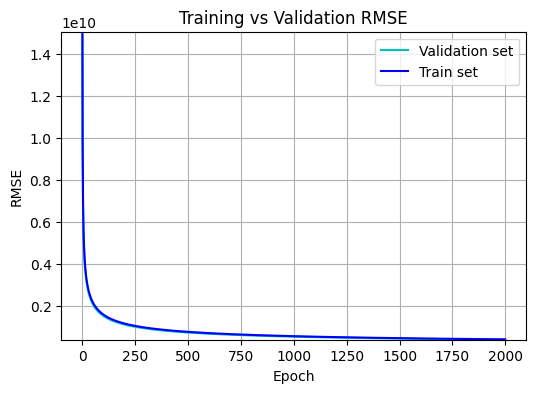

In [61]:
# sgd_reg.fit(X_train, y_train)
# Plot the learning curve

# Example data (replace with your real data)
val_errors = np.nan_to_num(val_errors)
train_errors = np.nan_to_num(train_errors)

plt.figure(figsize=(6, 4))
plt.plot(val_errors, "c", label="Validation set")
plt.plot(train_errors, "b", label="Train set")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.ylim([min(min(val_errors), min(train_errors)), max(max(val_errors), max(train_errors))])
plt.legend()
plt.grid()
plt.title("Training vs Validation RMSE")
plt.show()

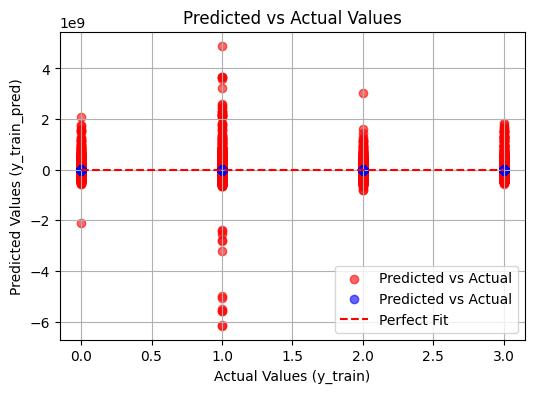

In [62]:
plt.figure(figsize=(6, 4))

# Plot predicted vs actual values
plt.scatter(y_train, sgd_reg.predict(X_train), alpha=0.6, label="Predicted vs Actual", color="r")
plt.scatter(y_train, lin_reg.predict(X_train), alpha=0.6, label="Predicted vs Actual", color="b")

# Reference line for perfect prediction
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", label="Perfect Fit")

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_train_pred)")
plt.title("Predicted vs Actual Values")
plt.grid()
plt.legend()
plt.show()

In [64]:
y_test_pred = sgd_reg.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE on test data = ", rmse_test)
print("R squared on test data = ", r2_test)

RMSE on test data =  439565031.3793018
R squared on test data =  -1.5311840949835498e+17


R² should be close to `1.0`. Both models produced R² values of approx. `0.52`, which is not perfect.
Additionally with a perfect fit, the RMSE would be close to `0`, which both models are far off.

### 4d. Finetuning

We optimized a regression model using polynomial features (degree 4) of the top 6 most correlated predictors. A `GridSearchCV` explored 540 combinations of hyperparameters for the `SGDRegressor`, including regularization (`alpha`), penalty types, learning rates, and iterations. This process achieved the best RMSE so far but was computationally intensive, taking over 2 hours in some cases. The results established a strong baseline for further optimization.

In [65]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Rented Bike Count", axis=1)
y = df_encoded["Rented Bike Count"]


# Find top n features
n = 6
correlation_matrix = df_encoded.corr()
correlations = correlation_matrix["Rented Bike Count"].drop("Rented Bike Count")
# Sort by absolute value while keeping the sign
top_n_correlations = correlations.reindex(correlations.abs().nlargest(n).index)
# Select the top n features from X_scaled
X_selected = X[top_n_correlations.index]

print(f"Top {n} Correlations with Rented Bike Count:")
print(top_n_correlations)

# Daten aufteilen: Train, Validation, Test
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Top 6 Correlations with Rented Bike Count:
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Seasons                     -0.253058
Functioning Day              0.203943
Name: Rented Bike Count, dtype: float64


In [66]:
# Lets find the PolynomialFeatures for the unscaled features 
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)
X_test_poly = scaler.transform(X_test_poly)

In [27]:
# Lets search for the best hyper parameters

# Define some parameter values for search
param_grid = {
    'alpha': [0.0001, 0.001],
    'penalty': ['l2', 'l1'],
    'l1_ratio': [0.15, 0.5, 0.9],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'eta0': [0.001],
    'max_iter': [500, 1000, 3000],
    'random_state': [seed_val],
}

sgd = SGDRegressor()
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Execute search
grid_search.fit(X_train_poly, y_train)
best_model = grid_search.best_estimator_
print(f"Best model {best_model}")

Best model SGDRegressor(eta0=0.001, learning_rate='adaptive', max_iter=3000, penalty='l1',
             random_state=42)


In [67]:
# SGDRegressor mit L2-Regularisierung
# sgd_reg = SGDRegressor(max_iter=3000, eta0=0.001, penalty='l1', learning_rate='constant', random_state=42)
sgd_reg = SGDRegressor(eta0=0.001, learning_rate='adaptive', max_iter=3000, penalty='l1', random_state=42)

# Modell trainieren
train_errors = []
val_errors = []

for epoch in range(3000):  # Iteratives Training
    sgd_reg.partial_fit(X_train_poly, y_train)

    # Vorhersagen für Training und Validierung
    y_train_pred = sgd_reg.predict(X_train_poly)
    y_val_pred = sgd_reg.predict(X_val_poly)

    # Fehler berechnen (RMSE)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

# Modell evaluieren
y_test_pred = sgd_reg.predict(X_test_poly)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"RMSE auf Testdaten: {test_rmse:.2f}")
print(f"R² auf Testdaten: {test_r2:.2f}")

RMSE auf Testdaten: 296.86
R² auf Testdaten: 0.78


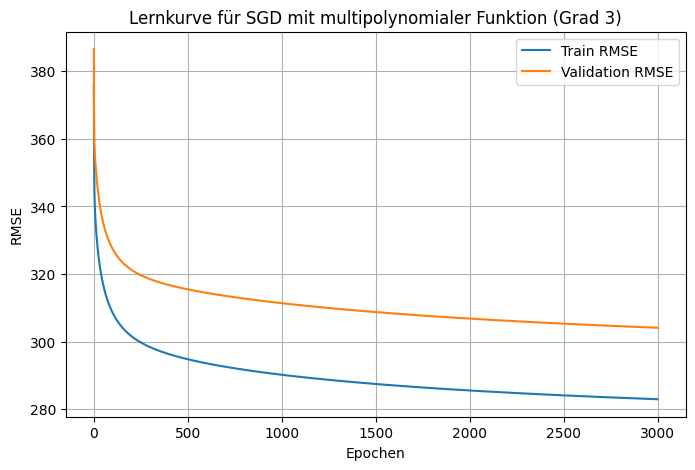

In [68]:
# Lernkurve visualisieren
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label="Train RMSE")
plt.plot(val_errors, label="Validation RMSE")
plt.xlabel("Epochen")
plt.ylabel("RMSE")
plt.title("Lernkurve für SGD mit multipolynomialer Funktion (Grad 3)")
plt.legend()
plt.grid()
plt.show()

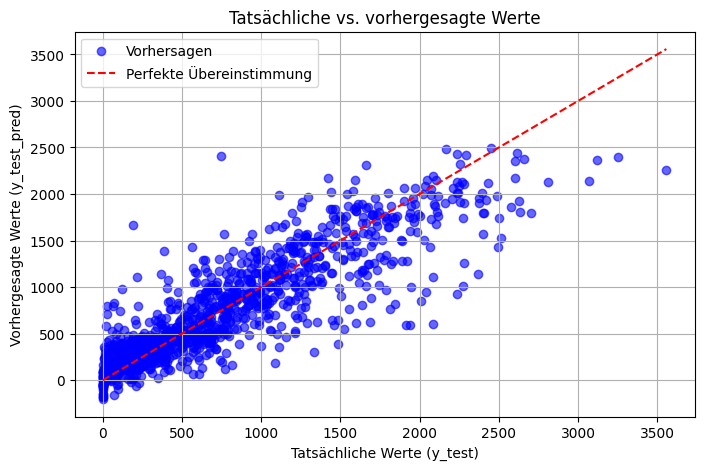

In [69]:
# Tatsächliche vs. vorhergesagte Werte
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label="Vorhersagen")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfekte Übereinstimmung")
plt.xlabel("Tatsächliche Werte (y_test)")
plt.ylabel("Vorhergesagte Werte (y_test_pred)")
plt.title("Tatsächliche vs. vorhergesagte Werte")
plt.legend()
plt.grid()
plt.show()

## 5. Classification
In this chapter, we aim to classify the seasons variable using the top correlating features identified in the dataset. While we did not focus on further improving the logistic regression model, we decided to explore other models like DTC and SVM to better capture the patterns in the data. The ultimate goal is to select the best-performing model for accurately detecting the seasons variable.
### 5a. Analysis goal

The category nature of `Seasons` makes it a great target for classification.

In [31]:
# Redefine X and y
X = df_encoded.drop("Seasons", axis=1)
y = df_encoded["Seasons"]

# Scale X
scaler = StandardScaler()
X_scaled_tmp = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_tmp, columns=X.columns, index=X.index)

# Find top n features
n = 6
correlation_matrix = df_encoded.corr()
correlations = correlation_matrix["Seasons"].drop("Seasons")
# Sort by absolute value while keeping the sign
top_n_correlations = correlations.reindex(correlations.abs().nlargest(n).index)
# Select the top n features from X_scaled
X_selected = X_scaled[top_n_correlations.index]

print(f"Top {n} Correlations with Rented Bike Count:")
print(top_n_correlations)

Top 6 Correlations with Rented Bike Count:
Month                       -0.376657
Temperature(°C)             -0.335207
Dew point temperature(°C)   -0.329027
Rented Bike Count           -0.253058
Functioning Day              0.223340
Snowfall (cm)                0.145457
Name: Seasons, dtype: float64


### 5b. Train logistik regression model

In [32]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=seed_val)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed_val)

In [33]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train Model
log_reg_model = LogisticRegression(solver="lbfgs", max_iter=500, random_state=seed_val)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

### 5c. Evaluate logistik regression model

In [34]:
y_train_pred = log_reg_model.predict(X_train)
y_val_pred = log_reg_model.predict(X_val)

log_reg_train_accuracy = accuracy_score(y_train, y_train_pred)
log_reg_val_accuracy = accuracy_score(y_val, y_val_pred)

print("Logistic Regression Train Accuracy:", log_reg_train_accuracy)
print("Logistic Regression Validation Accuracy:", log_reg_val_accuracy)
print()
print("Logistic Regression Train Classification Report:\n", classification_report(y_train, y_train_pred, target_names=encoder.classes_))
print("Logistic Regression Validation Classification Report:\n", classification_report(y_val, y_val_pred, target_names=encoder.classes_))


Logistic Regression Train Accuracy: 0.9187866927592955
Logistic Regression Validation Accuracy: 0.9124809741248098

Logistic Regression Train Classification Report:
               precision    recall  f1-score   support

      Autumn       0.95      0.94      0.94      1539
      Spring       0.91      0.88      0.89      1565
      Summer       0.93      0.96      0.94      1543
      Winter       0.89      0.89      0.89      1485

    accuracy                           0.92      6132
   macro avg       0.92      0.92      0.92      6132
weighted avg       0.92      0.92      0.92      6132

Logistic Regression Validation Classification Report:
               precision    recall  f1-score   support

      Autumn       0.94      0.91      0.93       330
      Spring       0.93      0.86      0.89       321
      Summer       0.90      0.97      0.93       339
      Winter       0.89      0.91      0.90       324

    accuracy                           0.91      1314
   macro avg      

**Overall Accuracy**:
- Train: 91.88%
- Validation: 91.25% (indicating good generalization).  

**Class Performance**:
- Best Class: Summer (highest recall: 0.97 on validation set).
- Lowest Recall: Spring (0.86 on validation), suggesting minor misclassifications.  

**Conclusion**:  
The model performs consistently well across all target classes with no significant overfitting or underfitting.

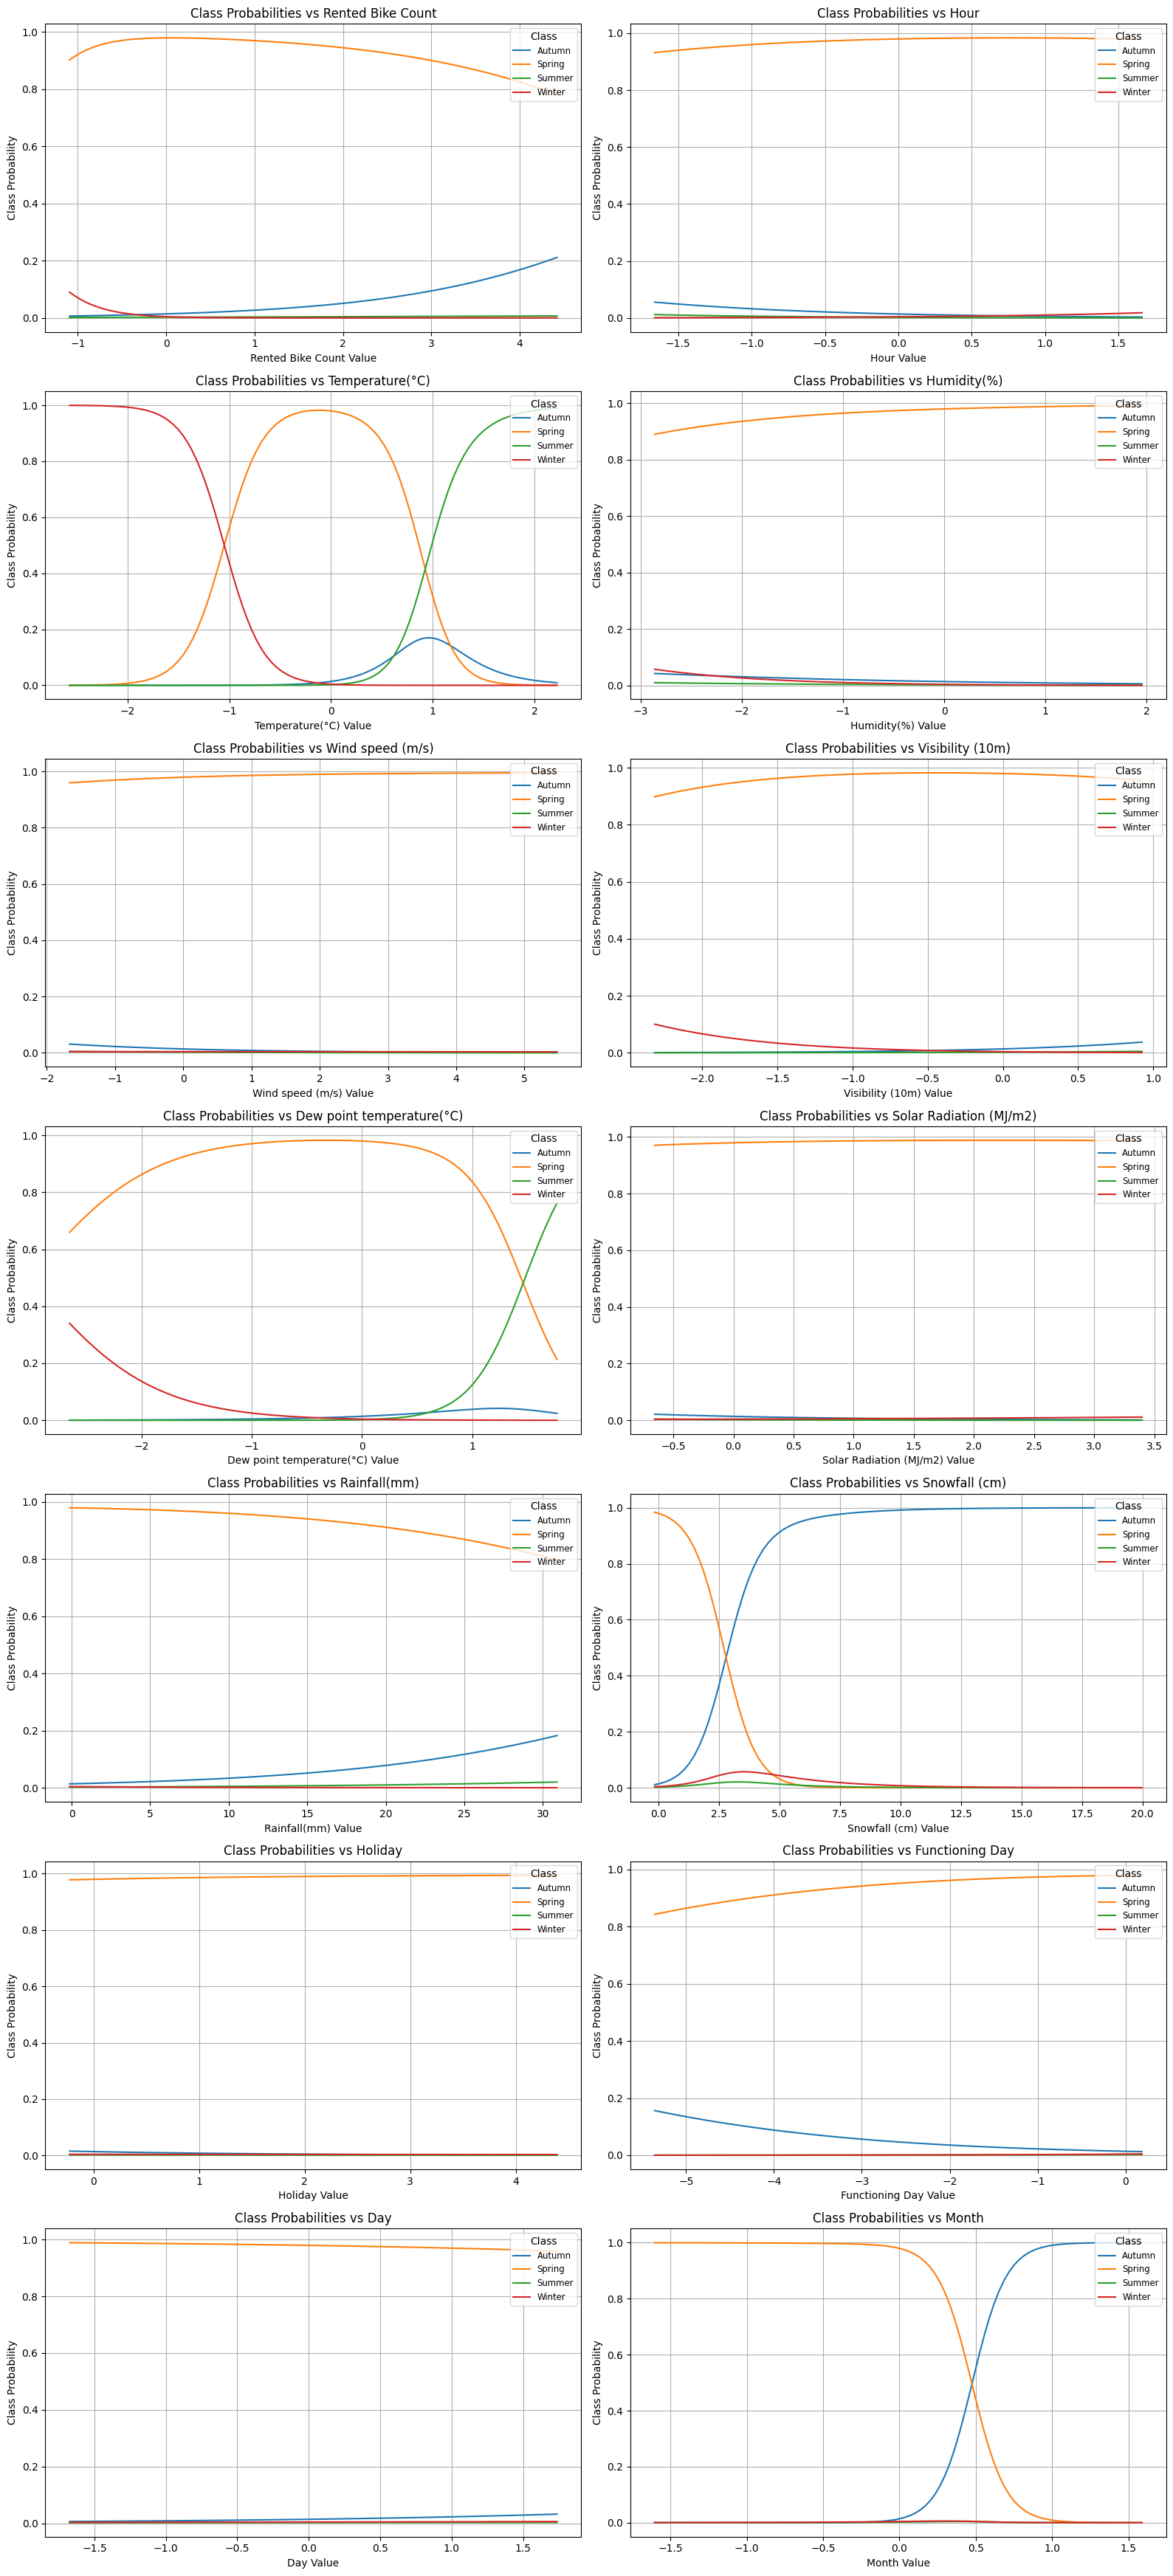

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unwanted features (customize this list as needed)
excluded_features = []  # Add feature names to exclude
selected_features = [col for col in X_scaled.columns if col not in excluded_features]

# Determine the number of features to plot
num_features = len(selected_features)
n_rows = (num_features + 1) // 2  # 2 plots per row

# Create a figure for subplots
plt.figure(figsize=(16, n_rows * 5))

# Loop through selected features and plot probabilities
for idx, feature_name in enumerate(selected_features):
    # Generate a range of values for the selected feature
    feature_range = np.linspace(X_scaled[feature_name].min(), X_scaled[feature_name].max(), 100)

    # Create a reference dataset where all features are set to their mean except the selected feature
    X_reference = X_scaled.mean().to_frame().T
    X_reference = pd.concat([X_reference] * len(feature_range), ignore_index=True)
    X_reference[feature_name] = feature_range

    # Get class probabilities for the generated dataset
    probabilities = log_reg_model.predict_proba(X_reference)

    # Create a DataFrame for plotting
    prob_df = pd.DataFrame(probabilities, columns=encoder.classes_)
    prob_df['Feature Value'] = feature_range
    prob_df = prob_df.melt(id_vars='Feature Value', var_name='Class', value_name='Probability')

    # Plot each feature's probabilities
    plt.subplot(n_rows, 2, idx + 1)
    sns.lineplot(data=prob_df, x='Feature Value', y='Probability', hue='Class')
    plt.title(f"Class Probabilities vs {feature_name}")
    plt.xlabel(f"{feature_name} Value")
    plt.ylabel("Class Probability")
    plt.legend(title="Class", loc='upper right', fontsize='small')
    plt.grid()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

The visualizations show how different features influence the probabilities of predicting each season (Autumn, Spring, Summer, and Winter). Among the features, `Temperature(°C)` stands out as the most significant, with high temperatures strongly indicating Summer and low temperatures marking Winter. A similar pattern is observed with `Dew Point Temperature(°C)`, further highlighting its role in separating warmer and colder seasons.

`Snowfall(cm)` is a highly distinct feature, as it almost exclusively predicts Winter, while `Rainfall(mm)` shows a notable influence on Spring and Autumn, reflecting their wetter conditions. In contrast, operational features such as `Holiday` and `Functioning Day show` minimal differentiation across seasons, as they are less related to environmental patterns.

Overall, temperature, snowfall, and rainfall emerge as the most informative features for distinguishing seasons, while other features like solar radiation or humidity provide additional, albeit subtler, insights into seasonal transitions.

### 5d. Improve the classification

Overall we are very satisfied with the models perfomance. Instead of optimization, we deciced to checkout other classification models.

### 5e. DTC & SVM

In [36]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=seed_val, ccp_alpha=.0)
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree Classifier
y_train_pred_dt = dt_model.predict(X_train)
y_val_pred_dt = dt_model.predict(X_val)

dt_train_accuracy = accuracy_score(y_train, y_train_pred_dt)
dt_val_accuracy = accuracy_score(y_val, y_val_pred_dt)

print("Decision Tree Train Accuracy:", dt_train_accuracy)
print("Decision Tree Validation Accuracy:", dt_val_accuracy)

Decision Tree Train Accuracy: 1.0
Decision Tree Validation Accuracy: 1.0


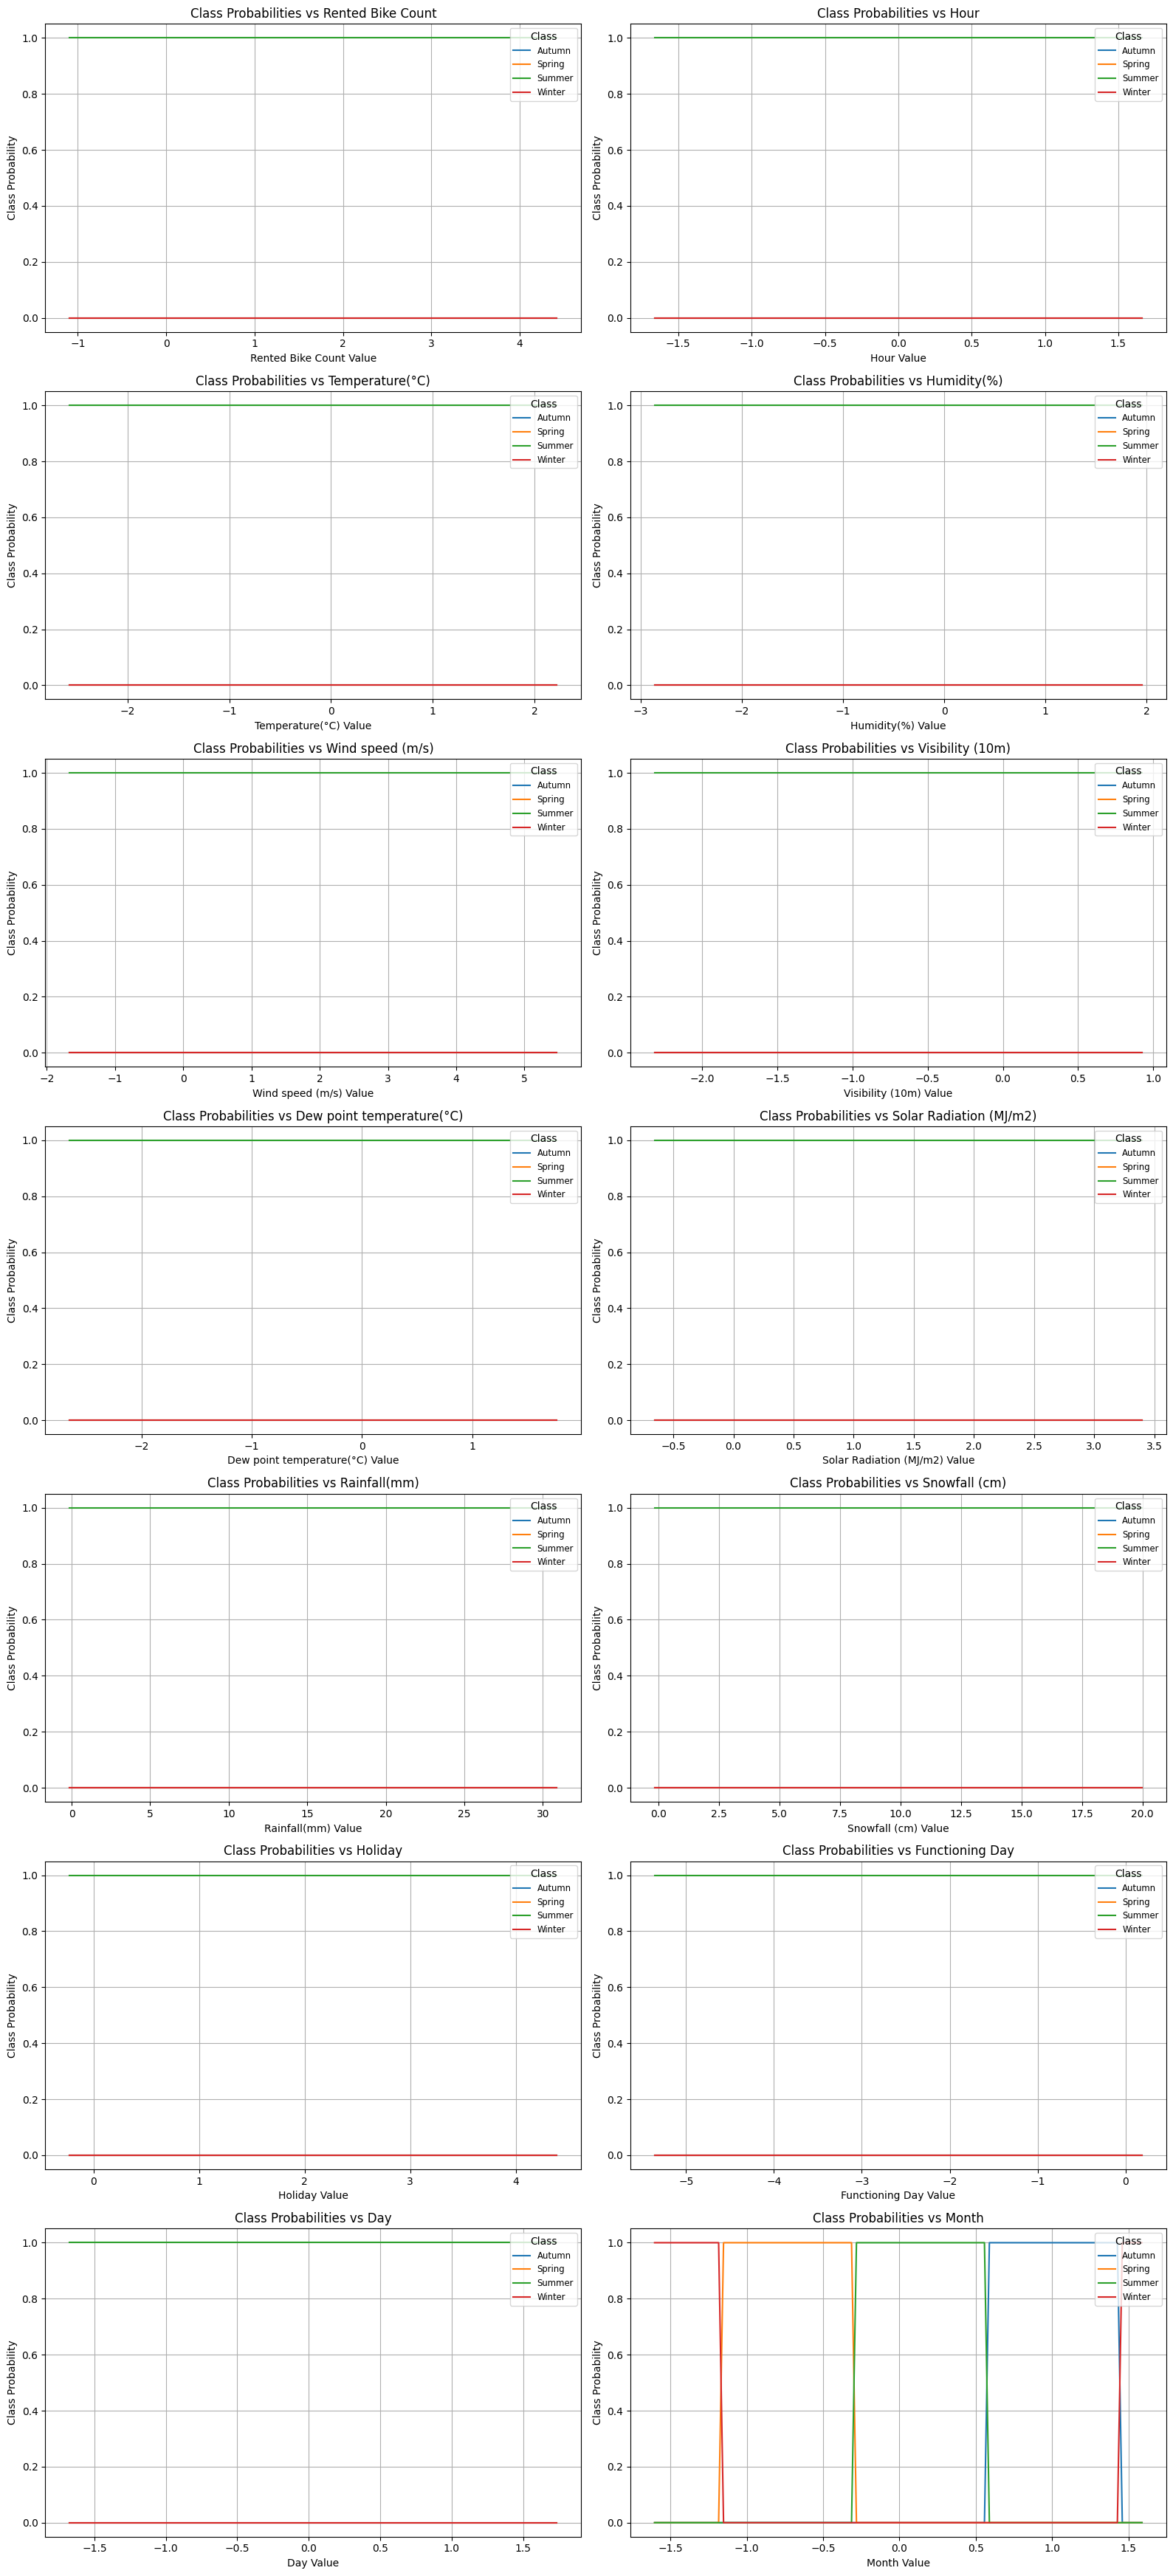

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unwanted features (customize this list as needed)
excluded_features = []  # Add feature names to exclude
selected_features = [col for col in X_scaled.columns if col not in excluded_features]

# Determine the number of features to plot
num_features = len(selected_features)
n_rows = (num_features + 1) // 2  # 2 plots per row

# Create a figure for subplots
plt.figure(figsize=(16, n_rows * 5))

# Loop through selected features and plot probabilities
for idx, feature_name in enumerate(selected_features):
    # Generate a range of values for the selected feature
    feature_range = np.linspace(X_scaled[feature_name].min(), X_scaled[feature_name].max(), 100)

    # Create a reference dataset where all features are set to their mean except the selected feature
    X_reference = X_scaled.mean().to_frame().T
    X_reference = pd.concat([X_reference] * len(feature_range), ignore_index=True)
    X_reference[feature_name] = feature_range

    # Get class probabilities for the generated dataset
    probabilities = dt_model.predict_proba(X_reference)

    # Create a DataFrame for plotting
    prob_df = pd.DataFrame(probabilities, columns=encoder.classes_)
    prob_df['Feature Value'] = feature_range
    prob_df = prob_df.melt(id_vars='Feature Value', var_name='Class', value_name='Probability')

    # Plot each feature's probabilities
    plt.subplot(n_rows, 2, idx + 1)
    sns.lineplot(data=prob_df, x='Feature Value', y='Probability', hue='Class')
    plt.title(f"Class Probabilities vs {feature_name}")
    plt.xlabel(f"{feature_name} Value")
    plt.ylabel("Class Probability")
    plt.legend(title="Class", loc='upper right', fontsize='small')
    plt.grid()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

The DTC results show rigid and segmented class probabilities, with sharp transitions rather than the smooth gradients seen in the previous model. Features like `Month` dominate, creating distinct splits between seasons, while most other features show little variability in their influence. This reflects the DTC's reliance on hard decision boundaries rather than gradual transitions.

In [38]:
from sklearn.svm import SVC

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True, random_state=seed_val, C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Evaluate SVM Classifier
y_train_pred_svm = svm_model.predict(X_train)
y_val_pred_svm = svm_model.predict(X_val)

svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
svm_val_accuracy = accuracy_score(y_val, y_val_pred_svm)

print("SVM Train Accuracy:", svm_train_accuracy)
print("SVM Validation Accuracy:", svm_val_accuracy)

SVM Train Accuracy: 0.965590345727332
SVM Validation Accuracy: 0.9680365296803652


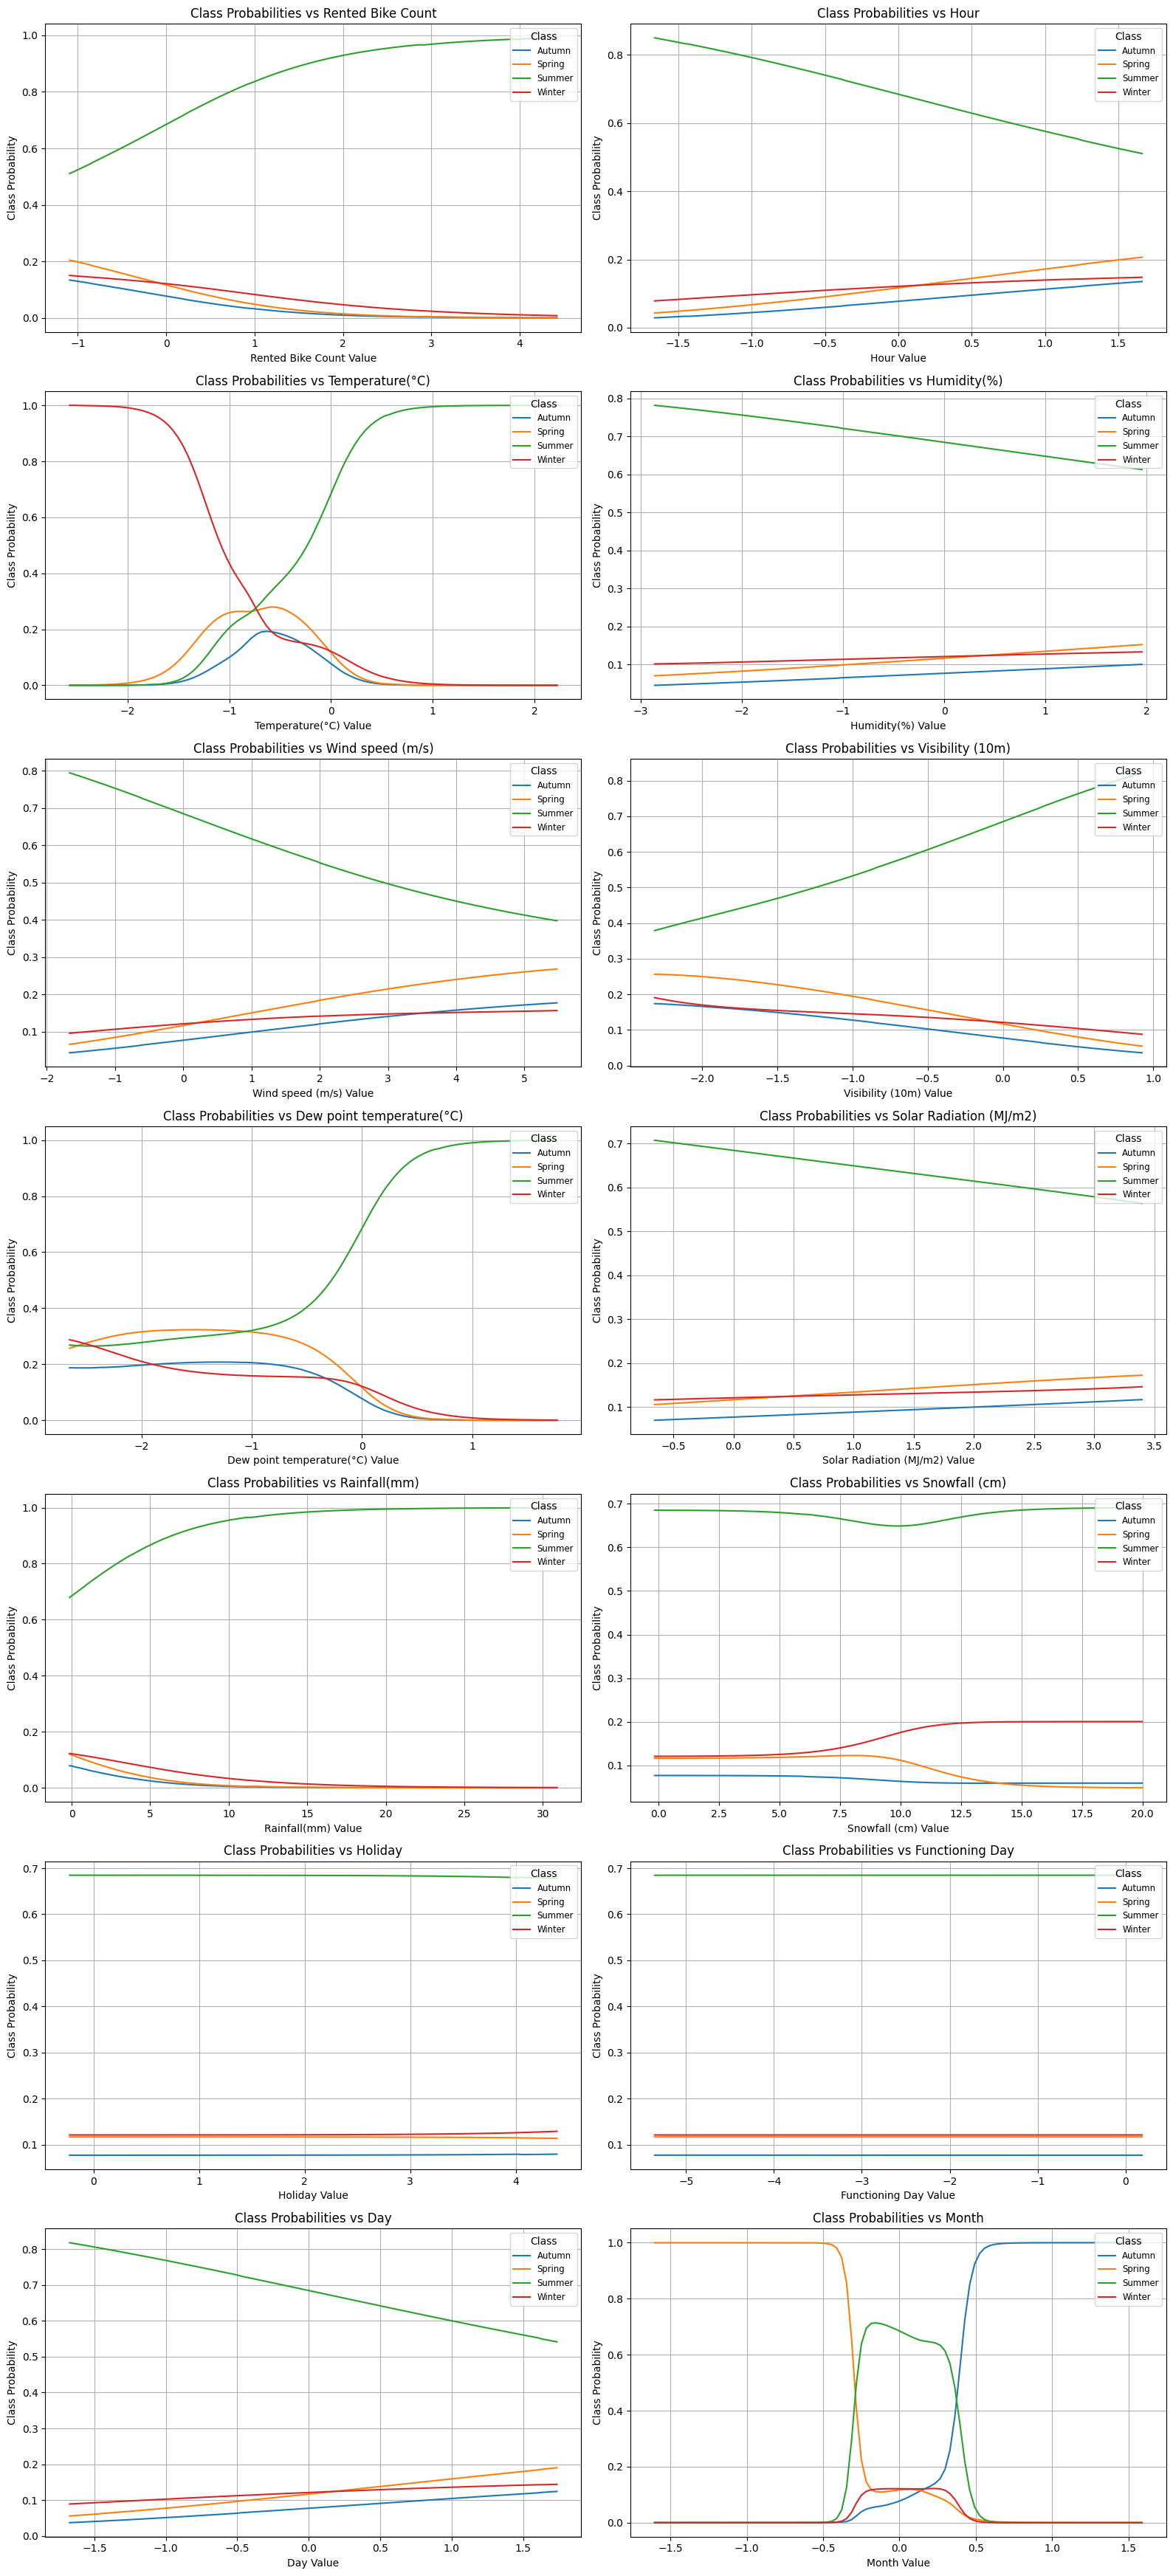

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unwanted features (customize this list as needed)
excluded_features = []  # Add feature names to exclude
selected_features = [col for col in X_scaled.columns if col not in excluded_features]

# Determine the number of features to plot
num_features = len(selected_features)
n_rows = (num_features + 1) // 2  # 2 plots per row

# Create a figure for subplots
plt.figure(figsize=(16, n_rows * 5))

# Loop through selected features and plot probabilities
for idx, feature_name in enumerate(selected_features):
    # Generate a range of values for the selected feature
    feature_range = np.linspace(X_scaled[feature_name].min(), X_scaled[feature_name].max(), 100)

    # Create a reference dataset where all features are set to their mean except the selected feature
    X_reference = X_scaled.mean().to_frame().T
    X_reference = pd.concat([X_reference] * len(feature_range), ignore_index=True)
    X_reference[feature_name] = feature_range

    # Get class probabilities for the generated dataset
    probabilities = svm_model.predict_proba(X_reference)

    # Create a DataFrame for plotting
    prob_df = pd.DataFrame(probabilities, columns=encoder.classes_)
    prob_df['Feature Value'] = feature_range
    prob_df = prob_df.melt(id_vars='Feature Value', var_name='Class', value_name='Probability')

    # Plot each feature's probabilities
    plt.subplot(n_rows, 2, idx + 1)
    sns.lineplot(data=prob_df, x='Feature Value', y='Probability', hue='Class')
    plt.title(f"Class Probabilities vs {feature_name}")
    plt.xlabel(f"{feature_name} Value")
    plt.ylabel("Class Probability")
    plt.legend(title="Class", loc='upper right', fontsize='small')
    plt.grid()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

The SVM results display smoother transitions in class probabilities compared to the Decision Tree Classifier (DTC), aligning more closely with the logistic regression model. However, unlike logistic regression, SVM creates more nuanced boundaries for separating classes, particularly visible in features like `Temperature(°C)` and `Dew Point Temperature(°C)`, where class probabilities overlap but gradually shift. Features such as `Month` and `Snowfall(cm)` still play dominant roles, as seen by clear probability changes, but the transitions are less abrupt than in the DTC results, reflecting SVM's ability to handle non-linear patterns effectively. Overall, SVM balances between flexibility and smoother transitions in the feature-target relationship

## 5f. Best classification model

In [40]:
best_model = max(
    [
        (log_reg_model, log_reg_val_accuracy, "Logistic Regression"),
        (dt_model, dt_val_accuracy, "Decision Tree"),
        (svm_model, svm_val_accuracy, "SVM"),
    ],
    key=lambda x: x[1],
)

print(f"The best model is: {best_model[2]} with Validation Accuracy: {best_model[1]}")

# Evaluate the best model on the test set
y_test_pred = best_model[0].predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred, target_names=encoder.classes_))

The best model is: Decision Tree with Validation Accuracy: 1.0
Test Accuracy: 1.0
Test Classification Report:
               precision    recall  f1-score   support

      Autumn       1.00      1.00      1.00       315
      Spring       1.00      1.00      1.00       322
      Summer       1.00      1.00      1.00       326
      Winter       1.00      1.00      1.00       351

    accuracy                           1.00      1314
   macro avg       1.00      1.00      1.00      1314
weighted avg       1.00      1.00      1.00      1314



Due to DTC's ability to figure out the connection of `Month` to the `Seasons` target it easily dominates with the highest scores and the least amount of features required.

## 6. Comparison regression vs classification

### 6a. Advantages of the models

**Advantages of Regression Model**:
- Provides continuous predictions, useful for problems requiring precise numerical outputs.
- Captures relationships between features and the target variable.
- Easier to interpret in terms of trends and magnitude of change.

**Advantages of Classification Model**:
- Outputs discrete classes, making it ideal for categorical decision-making.
- Provides probability estimates for class membership.
- Handles imbalanced datasets better with metrics like precision, recall, and F1-score.

### 6b. Best suited model for bike demand

Since we decided to classify the `Seasons` variable in our classification task, we cannot possibly answer this.